In [2]:
#Kaksinkertaista eksponentiaalista tasoitusta kutsutaan myös Holtin malliksi.
#Kaksinkertainen eksponentiaalinen tasoitus sopii aikasarjoille, joissa on trendi, mutta ei havaittavaa kausivaihtelua. Eksponentiaalisen tasoituksen mallit (yksinkertainen, kaksinkertainen ja kolminkertainen) ovat erityisen suosittuja liiketaloudessa kysynnän ennustamisessa. Mallit ovat helppokäyttöisiä, nopeasti laskettavissa ja helposti päivitettävissä uusien havaintojen myötä.
#Eksponentiaalinen tasoitus löytyy statsmodels.tsa-kirjastosta.
#Huomaa, että tässä esimerkissä kaksinkertainen eksoponentiaalinen tasoitus ei ole hyvä malli, koska aikasarjassa on selkeä kausivaihtelu, jonka malli jättää huomiotta!
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [3]:
df=pd.read_csv('http://taanila.fi/beer.csv')
df.index=pd.to_datetime(df['Month'],format='%Y-%m')
df=df.drop('Month',axis=1)
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


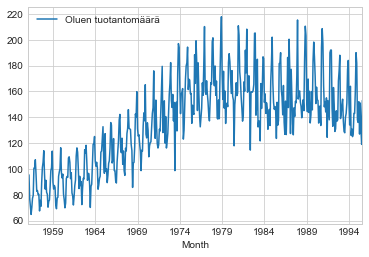

In [4]:
df = df.rename(columns = {'Monthly beer production': 'Oluen tuotantomäärä'})
df.plot()

In [6]:
#Mallin sovitus
#Ennustemalli sovitetaan (fit()) dataan. Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi malli), joka sisältää monenlaista tietoa mallista.
#Trendiin (trend) käytän summamallia (add), jossa trendi on aikasarjaan lisättävä termi. Tämä on suositeltavin vaihtoehto.
#freq-parametrille käytän arvoa 'MS', koska kyseessä on kuukauden 1. päivä. Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
malli = ExponentialSmoothing(df['Oluen tuotantomäärä'], trend = 'add', freq='MS').fit()

In [7]:
# malli-olion avulla saan mallin mukaan simuloidut ennusteet (fittedvalues) jo toteutuneille ajankohdille
df['Ennuste'] = malli.fittedvalues
df

,Oluen tuotantomäärä,Ennuste
Month,,
1956-01-01,93.2,93.284144
1956-02-01,96.0,93.333372
1956-03-01,95.2,95.246576
1956-04-01,77.1,95.321261
1956-05-01,70.9,83.080425
...,...,...
1995-04-01,127.0,148.641784
1995-05-01,151.0,134.083136
1995-06-01,130.0,145.652577


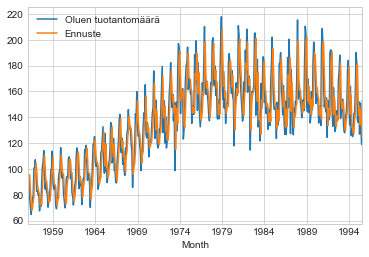

In [8]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [9]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Oluen tuotantomäärä,Ennuste,Ennustevirhe
Month,,,
1956-01-01,93.2,93.284144,-0.084144
1956-02-01,96.0,93.333372,2.666628
1956-03-01,95.2,95.246576,-0.046576
1956-04-01,77.1,95.321261,-18.221261
1956-05-01,70.9,83.080425,-12.180425
...,...,...,...
1995-04-01,127.0,148.641784,-21.641784
1995-05-01,151.0,134.083136,16.916864
1995-06-01,130.0,145.652577,-15.652577


Text(0, 0.5, 'Ennustevirhe')

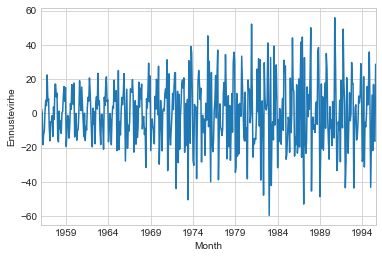

In [10]:
#Mallin tarkastelu
#Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän
#ennustevirheiden aikasarjaa viivakaaviona
#ennusteiden ja toteutuneiden arvojen hajontakaaviota
#malliin liittyvää statistiikkaa, jonka saan summary()-toiminnolla.
#Huomaa erityisesti SSE (sum of squared errors). Mallia laskeva algoritmi yrittää saada SSE:n mahdollisimman pieneksi.
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut kysyntä')

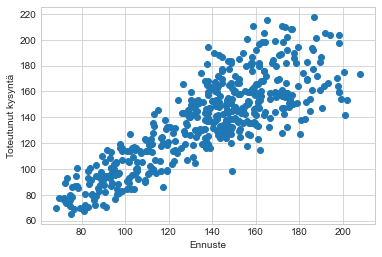

In [11]:
# Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
plt.scatter(x = df['Ennuste'], y = df['Oluen tuotantomäärä'])
plt.xlabel('Ennuste')
plt.ylabel('Toteutunut kysyntä')

In [12]:
malli.summary()

Dep. Variable:,endog,No. Observations:,476
Model:,ExponentialSmoothing,SSE,169810.952
Optimized:,True,AIC,2805.463
Trend:,Additive,BIC,2822.125
Seasonal:,None,AICC,2805.642
Seasonal Periods:,None,Date:,"Fri, 15 Jan 2021"
Box-Cox:,False,Time:,15:57:00
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6776195,alpha,True
smoothing_slope,0.000000,beta,True


In [13]:
#Ennusteiden laskeminen
#Ennustettavien ajankohtien aikaleimojen määrittämiseksi:
#Ensimmäisen ennustettavan ajankohdan aikaleiman täytyy olla aikasarjan viimeisintä aikaleimaa seuraava aikaleima.
#Ennustettavien ajankohtien lukumäärän voin määrittää periods-parametrilla.
#Ennustettavien ajankohtien frekvenssin on oltava sama kuin mallia sovitettaessa käytetty freq-parametrin arvo.
#Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
#Tarkistan viimeisen aikaleiman
df.tail()

,Oluen tuotantomäärä,Ennuste,Ennustevirhe
Month,,,
1995-04-01,127.0,148.641784,-21.641784
1995-05-01,151.0,134.083136,16.916864
1995-06-01,130.0,145.652577,-15.652577
1995-07-01,119.0,135.152332,-16.152332
1995-08-01,153.0,124.313443,28.686557


In [14]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä aikasarjan viimeistä aikaleimaa seuraava aikaleima)
index = pd.date_range('1995-09-01', periods = 12, freq = 'MS')

# Ennusteet kahdeksalle vuosineljännekselle
ennusteet = malli.forecast(12)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data = ennusteet, index = index, 
                          columns = ['Ennuste'])
df_ennuste

,Ennuste
1995-09-01,143.858257
1995-10-01,143.964503
1995-11-01,144.070748
1995-12-01,144.176994
1996-01-01,144.283239
1996-02-01,144.389484
1996-03-01,144.495730
1996-04-01,144.601975
1996-05-01,144.708220
1996-06-01,144.814466


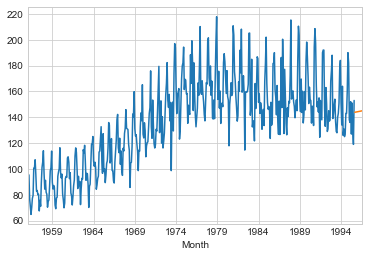

In [15]:
# Viivakaavio havainnoista
df['Oluen tuotantomäärä'].plot()

# Ennusteet kaavioon
df_ennuste['Ennuste'].plot()

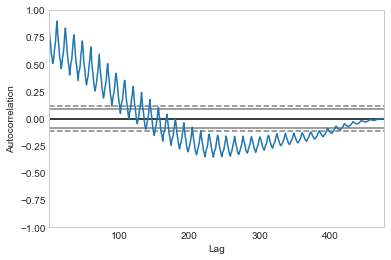

In [16]:
#Aikasarjassa on erotettavissa selkeä jaksoissa toistuva kausivaihtelu, jota kaksinkertainen eksponentiaalinen tasoitus ei huomioi ennusteessa. Asiaa voin tarkastella myös autokorrelaatioiden avulla. Autokorrelaatio tarkoittaa aikasarjan korrelaatiota viivästetyn aikasarjan kanssa, esimerkiksi aikasarjan korrelaatio neljänkymmenen päivän takaisiin aikasarjan arvoihin. Autokorrelaatio voidaan laskea eri viiveille. Tämän voin tehdä pandas-kirjaston autocorrelation_plot-toiminnolla:
#Vaaka-akselilla on viive (lag) ja pystyakselilla autokorrelaatiokertoimen arvo. Huomaan, että viiveen 100 kohdalla on suurehko korrelaatio. Tämä viittaa  kausivaihtelujaksoon. Kuvion katkoviivat edustavat tilastollisesti merkitsevän korrelaation rajoja. Ennen viivettä 100 kohdalla korrelaatio on katkoviivan yläpuolella ja näin ollen tilastollisesti merkitsevä.
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Oluen tuotantomäärä'])